# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import datetime as dt
from datetime import datetime
import calendar

In [2]:
# To ensure the created charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
path=r'C:\Users\sruth\OneDrive\Desktop\Career Foundry\Data Immersion\A6-Advanced Analytics & Dashboard design\6.2'

In [4]:
df_bank=pd.read_csv(os.path.join(path,'Data','Prepared Data','Bank Transactions.csv'))

# 2.Explore Data

In [5]:
df_bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,15:38:32,459.0
1,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,15:38:34,2060.0
2,T5,C9031234,24/3/88,F,MUMBAI,6714.43,2/8/16,02:19:16,1762.5
3,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,00:16:46,566.0
4,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,23:22:17,148.0


In [6]:
df_bank.shape

(660304, 9)

In [7]:
df_bank.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [8]:
df_bank.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime             object
TransactionAmount (INR)    float64
dtype: object

In [9]:
# convert CustomerDOB from string to date format
df_bank['CustomerDOB'] = pd.to_datetime(df_bank['CustomerDOB'])

In [10]:
df_bank['CustomerDOB']

0        1996-11-26
1        1973-09-14
2        1988-03-24
3        1992-01-26
4        1982-01-27
            ...    
660299   1980-05-24
660300   1992-11-19
660301   1990-08-04
660302   1989-05-18
660303   1984-05-03
Name: CustomerDOB, Length: 660304, dtype: datetime64[ns]

In [11]:
df_bank.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate                    object
TransactionTime                    object
TransactionAmount (INR)           float64
dtype: object

In [12]:
# create a new column Age from the existing column CustomerDOB
df_bank['Age'] = (dt.datetime.today() - df_bank['CustomerDOB']).dt.days/365

In [13]:
df_bank.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,15:38:32,459.00,26.476712
1,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,15:38:34,2060.00,49.693151
2,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2/8/16,02:19:16,1762.50,35.158904
3,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,00:16:46,566.00,31.315068
4,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,23:22:17,148.00,41.317808
5,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,05:33:45,833.00,35.087671
6,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,05:27:26,289.11,38.915068
7,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2/8/16,08:42:13,259.00,40.835616
8,T13,C6339347,1978-06-13,M,AHMEDABAD,32274.78,2/8/16,08:37:14,12300.00,44.945205
9,T14,C8327851,1992-05-01,F,THANE,59950.44,1/8/16,23:31:46,50.00,31.052055


In [14]:
df_bank.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate                    object
TransactionTime                    object
TransactionAmount (INR)           float64
Age                               float64
dtype: object

In [15]:
df_bank['Age'].value_counts(dropna=False)

 NaN          38772
 34.383562      501
 33.367123      458
 33.383562      390
 44.460274      378
              ...  
-40.073973        1
-28.873973        1
-28.241096        1
-20.920548        1
-42.210959        1
Name: Age, Length: 15136, dtype: int64

In [16]:
# Due to NA values in CustomerDOB, some of the entries in 'Age' are blank.
# Additionally, some DOBs were misquoted as greater than the current date.
# So Imputing those values as 0 for further analysis.

In [17]:
#Imputing blank values in Age as 0 
df_bank['Age'].fillna(0,inplace=True)

In [18]:
df_bank['Age'].value_counts(dropna=False)

 0.000000     38772
 34.383562      501
 33.367123      458
 33.383562      390
 44.460274      378
              ...  
-40.073973        1
-28.873973        1
-28.241096        1
-20.920548        1
-42.210959        1
Name: Age, Length: 15136, dtype: int64

In [19]:
# some DOBs were misquoted as greater than the current date.So the age is in -ve values.So inputing those values to 0
df_bank[df_bank['Age']<0]=0

In [20]:
df_bank['Age'].value_counts(dropna=False)

0.000000     94222
34.383562      501
33.367123      458
33.383562      390
44.460274      378
             ...  
18.441096        1
27.852055        1
21.920548        1
26.827397        1
7.487671         1
Name: Age, Length: 9301, dtype: int64

In [21]:
df_bank.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2/8/16,15:38:32,459.00,26.476712
1,T4,C5342380,1973-09-14 00:00:00,F,MUMBAI,866503.21,2/8/16,15:38:34,2060.00,49.693151
2,T5,C9031234,1988-03-24 00:00:00,F,MUMBAI,6714.43,2/8/16,02:19:16,1762.50,35.158904
3,T7,C7126560,1992-01-26 00:00:00,F,MUMBAI,973.46,2/8/16,00:16:46,566.00,31.315068
4,T8,C1220223,1982-01-27 00:00:00,M,MUMBAI,95075.54,2/8/16,23:22:17,148.00,41.317808
5,T9,C8536061,1988-04-19 00:00:00,F,GURGAON,14906.96,2/8/16,05:33:45,833.00,35.087671
6,T10,C6638934,1984-06-22 00:00:00,M,MUMBAI,4279.22,2/8/16,05:27:26,289.11,38.915068
7,T11,C5430833,1982-07-22 00:00:00,M,MOHALI,48429.49,2/8/16,08:42:13,259.00,40.835616
8,T13,C6339347,1978-06-13 00:00:00,M,AHMEDABAD,32274.78,2/8/16,08:37:14,12300.00,44.945205
9,T14,C8327851,1992-05-01 00:00:00,F,THANE,59950.44,1/8/16,23:31:46,50.00,31.052055


In [22]:
# Converting Age from Float64 to int 64(rounded)
df_bank['Age']=df_bank['Age'].round().astype('int64')


In [23]:
df_bank.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2/8/16,15:38:32,459.00,26
1,T4,C5342380,1973-09-14 00:00:00,F,MUMBAI,866503.21,2/8/16,15:38:34,2060.00,50
2,T5,C9031234,1988-03-24 00:00:00,F,MUMBAI,6714.43,2/8/16,02:19:16,1762.50,35
3,T7,C7126560,1992-01-26 00:00:00,F,MUMBAI,973.46,2/8/16,00:16:46,566.00,31
4,T8,C1220223,1982-01-27 00:00:00,M,MUMBAI,95075.54,2/8/16,23:22:17,148.00,41
5,T9,C8536061,1988-04-19 00:00:00,F,GURGAON,14906.96,2/8/16,05:33:45,833.00,35
6,T10,C6638934,1984-06-22 00:00:00,M,MUMBAI,4279.22,2/8/16,05:27:26,289.11,39
7,T11,C5430833,1982-07-22 00:00:00,M,MOHALI,48429.49,2/8/16,08:42:13,259.00,41
8,T13,C6339347,1978-06-13 00:00:00,M,AHMEDABAD,32274.78,2/8/16,08:37:14,12300.00,45
9,T14,C8327851,1992-05-01 00:00:00,F,THANE,59950.44,1/8/16,23:31:46,50.00,31


In [24]:
df_bank.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime             object
TransactionAmount (INR)    float64
Age                          int64
dtype: object

In [25]:
df_bank['TransactionDate'].value_counts(dropna=False)

0           55450
7/8/16      16040
13/8/16     15925
6/8/16      15697
3/9/16      15670
4/9/16      15421
10/9/16     15062
14/8/16     14868
11/9/16     14716
15/8/16     13862
21/8/16     13372
2/9/16      13199
1/9/16      12994
12/8/16     12954
27/8/16     12637
10/8/16     12478
9/8/16      12440
8/9/16      12426
11/8/16     12375
9/9/16      12333
20/8/16     12314
17/8/16     12281
28/8/16     12240
5/9/16      12202
5/8/16      12201
7/9/16      12191
2/8/16      12166
8/8/16      11992
1/8/16      11991
4/8/16      11974
3/8/16      11872
12/9/16     11736
13/9/16     11726
16/8/16     11556
14/9/16     11479
6/9/16      11356
15/9/16     11349
31/8/16     11335
18/8/16     11075
19/8/16     10670
25/8/16     10652
22/8/16     10517
24/8/16     10367
26/8/16     10175
23/8/16      9892
30/8/16      9734
29/8/16      9452
18/9/16      8431
26/9/16      7176
25/9/16      4790
27/9/16      4244
22/9/16      3968
21/10/16     2128
23/9/16      2028
30/9/16      1124
16/10/16  

In [26]:
# Replaced wrong transaction date 0 to 1/1/2016,as all transactions are in 2016
df_bank['TransactionDate'] = df_bank['TransactionDate'].replace([0], ['1/1/2016'])

In [27]:
df_bank['TransactionDate'].value_counts(dropna=False)

1/1/2016    55450
7/8/16      16040
13/8/16     15925
6/8/16      15697
3/9/16      15670
4/9/16      15421
10/9/16     15062
14/8/16     14868
11/9/16     14716
15/8/16     13862
21/8/16     13372
2/9/16      13199
1/9/16      12994
12/8/16     12954
27/8/16     12637
10/8/16     12478
9/8/16      12440
8/9/16      12426
11/8/16     12375
9/9/16      12333
20/8/16     12314
17/8/16     12281
28/8/16     12240
5/9/16      12202
5/8/16      12201
7/9/16      12191
2/8/16      12166
8/8/16      11992
1/8/16      11991
4/8/16      11974
3/8/16      11872
12/9/16     11736
13/9/16     11726
16/8/16     11556
14/9/16     11479
6/9/16      11356
15/9/16     11349
31/8/16     11335
18/8/16     11075
19/8/16     10670
25/8/16     10652
22/8/16     10517
24/8/16     10367
26/8/16     10175
23/8/16      9892
30/8/16      9734
29/8/16      9452
18/9/16      8431
26/9/16      7176
25/9/16      4790
27/9/16      4244
22/9/16      3968
21/10/16     2128
23/9/16      2028
30/9/16      1124
16/10/16  

In [28]:
# convert TransactionDate from string to date format
df_bank['TransactionDate'] = pd.to_datetime(df_bank['TransactionDate'])

In [29]:
df_bank['TransactionDate'].value_counts(dropna=False)

2016-01-01    55450
2016-07-08    16040
2016-08-13    15925
2016-06-08    15697
2016-03-09    15670
2016-04-09    15421
2016-10-09    15062
2016-08-14    14868
2016-11-09    14716
2016-08-15    13862
2016-08-21    13372
2016-02-09    13199
2016-01-09    12994
2016-12-08    12954
2016-08-27    12637
2016-10-08    12478
2016-09-08    12440
2016-08-09    12426
2016-11-08    12375
2016-09-09    12333
2016-08-20    12314
2016-08-17    12281
2016-08-28    12240
2016-05-09    12202
2016-05-08    12201
2016-07-09    12191
2016-02-08    12166
2016-08-08    11992
2016-01-08    11991
2016-04-08    11974
2016-03-08    11872
2016-12-09    11736
2016-09-13    11726
2016-08-16    11556
2016-09-14    11479
2016-06-09    11356
2016-09-15    11349
2016-08-31    11335
2016-08-18    11075
2016-08-19    10670
2016-08-25    10652
2016-08-22    10517
2016-08-24    10367
2016-08-26    10175
2016-08-23     9892
2016-08-30     9734
2016-08-29     9452
2016-09-18     8431
2016-09-26     7176
2016-09-25     4790


In [30]:
# Extract month from TransactionDate
df_bank['month of transaction'] = pd.DatetimeIndex(df_bank['TransactionDate']).month

In [31]:
df_bank.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,month of transaction
0,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2016-02-08,15:38:32,459.00,26,2
1,T4,C5342380,1973-09-14 00:00:00,F,MUMBAI,866503.21,2016-02-08,15:38:34,2060.00,50,2
2,T5,C9031234,1988-03-24 00:00:00,F,MUMBAI,6714.43,2016-02-08,02:19:16,1762.50,35,2
3,T7,C7126560,1992-01-26 00:00:00,F,MUMBAI,973.46,2016-02-08,00:16:46,566.00,31,2
4,T8,C1220223,1982-01-27 00:00:00,M,MUMBAI,95075.54,2016-02-08,23:22:17,148.00,41,2
5,T9,C8536061,1988-04-19 00:00:00,F,GURGAON,14906.96,2016-02-08,05:33:45,833.00,35,2
6,T10,C6638934,1984-06-22 00:00:00,M,MUMBAI,4279.22,2016-02-08,05:27:26,289.11,39,2
7,T11,C5430833,1982-07-22 00:00:00,M,MOHALI,48429.49,2016-02-08,08:42:13,259.00,41,2
8,T13,C6339347,1978-06-13 00:00:00,M,AHMEDABAD,32274.78,2016-02-08,08:37:14,12300.00,45,2
9,T14,C8327851,1992-05-01 00:00:00,F,THANE,59950.44,2016-01-08,23:31:46,50.00,31,1


In [32]:
df_bank['month of transaction'].value_counts(dropna=False)

8     247342
9      91088
1      80435
10     29669
7      28231
3      27542
4      27395
11     27091
6      27053
2      25365
12     24690
5      24403
Name: month of transaction, dtype: int64

In [33]:
# convert month number to month name
df_bank['Trans_monthname'] = df_bank['month of transaction'].apply(lambda x: calendar.month_abbr[x])

In [34]:
df_bank['month of transaction'].value_counts(dropna=False)

8     247342
9      91088
1      80435
10     29669
7      28231
3      27542
4      27395
11     27091
6      27053
2      25365
12     24690
5      24403
Name: month of transaction, dtype: int64

In [35]:
df_bank.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'Age',
       'month of transaction', 'Trans_monthname'],
      dtype='object')

In [36]:
#Create a subset 
df_bank_sub=df_bank[[ 'Age','month of transaction','CustAccountBalance', 'TransactionAmount (INR)']]

In [37]:
df_bank_sub.head(10)

,Age,month of transaction,CustAccountBalance,TransactionAmount (INR)
0,26,2,17874.44,459.00
1,50,2,866503.21,2060.00
2,35,2,6714.43,1762.50
3,31,2,973.46,566.00
4,41,2,95075.54,148.00
5,35,2,14906.96,833.00
6,39,2,4279.22,289.11
7,41,2,48429.49,259.00
8,45,2,32274.78,12300.00
9,31,1,59950.44,50.00


# 3. Exploring Relationships

# Correlation

In [38]:
# create a correlation matrix
df_bank_sub.corr()

,Age,month of transaction,CustAccountBalance,TransactionAmount (INR)
Age,1.000000,0.389825,0.014490,0.009656
month of transaction,0.389825,1.000000,0.035641,0.037200
CustAccountBalance,0.014490,0.035641,1.000000,0.066495
TransactionAmount (INR),0.009656,0.037200,0.066495,1.000000


# Create a correlation heatmap using matplotlib

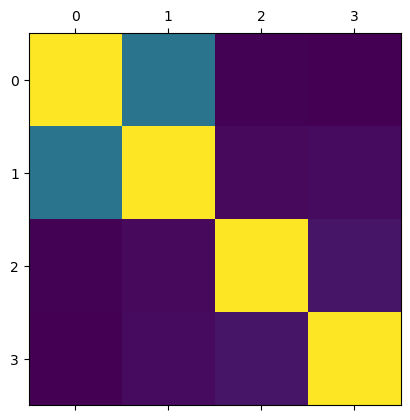

In [39]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_bank_sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

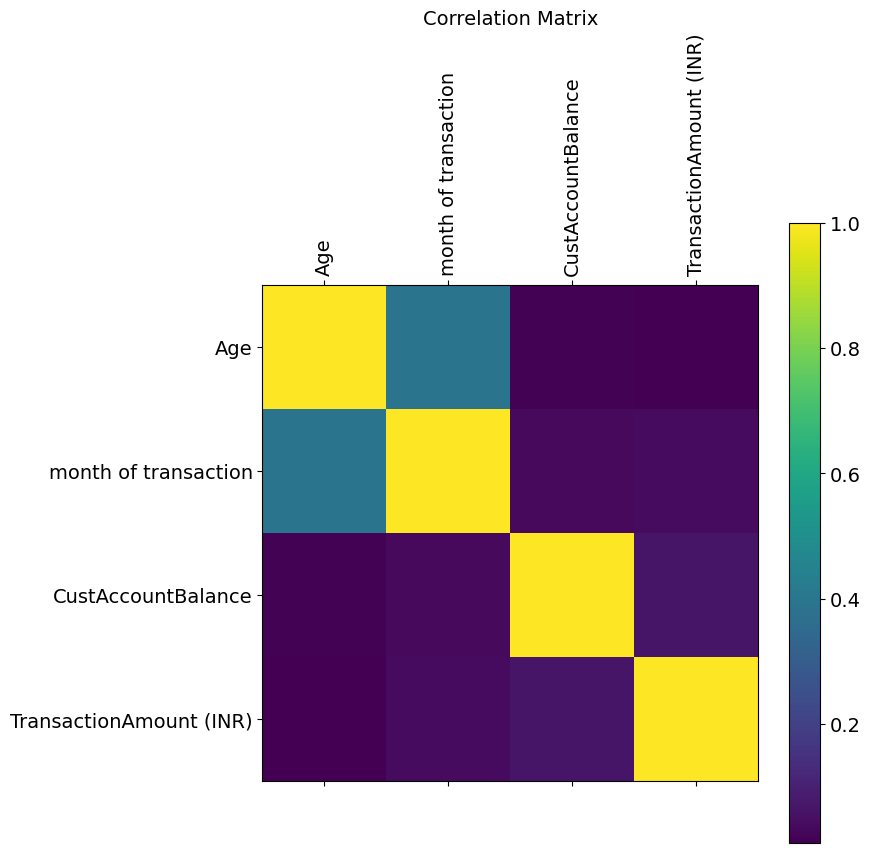

In [40]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_bank_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_bank_sub.shape[1]), df_bank_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_bank_sub.shape[1]), df_bank_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# Create a correlation heatmap using seaborn:

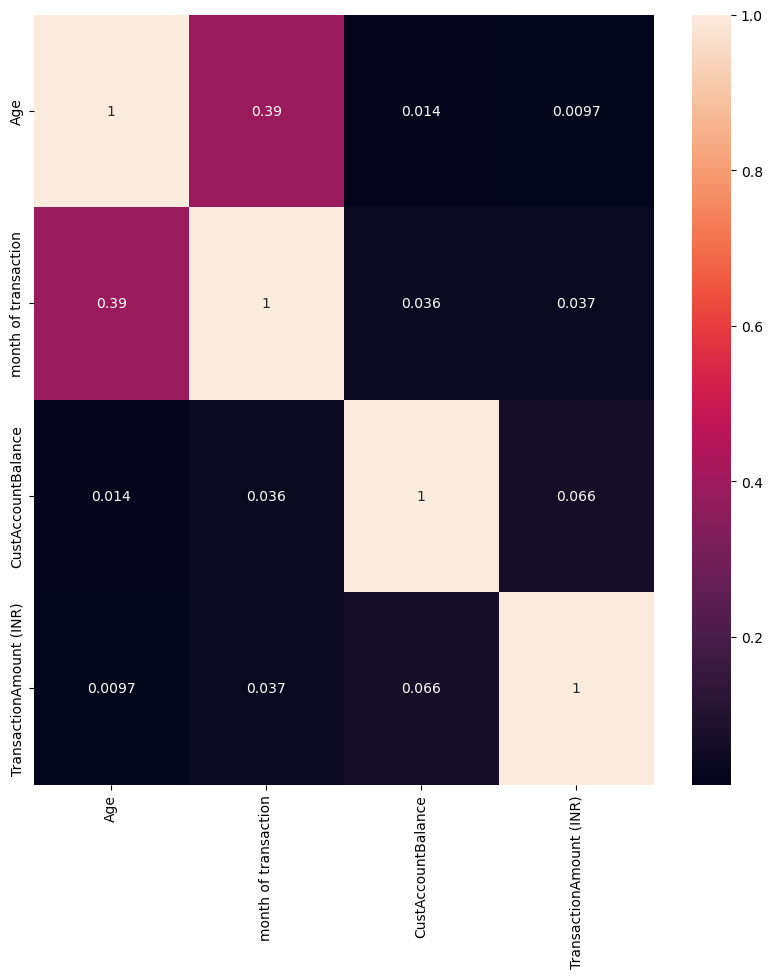

In [41]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_bank_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

In [42]:
# 0.066 coefficient indicates no/weak relationship between transaction amount & the customer account balance
#0.0097 coefficient indicates no/weak relationship between Age & transaction amount
#0.014  coefficient indicates no/weak relationship between Age & cust Account balance
#0.39  coefficient indicates moderate relationship between Age & month of transaction.But it doesnt make any sense.
#0.037 oefficient indicates no/weak relationship between month of transaction & transaction amount

# ScatterPlots

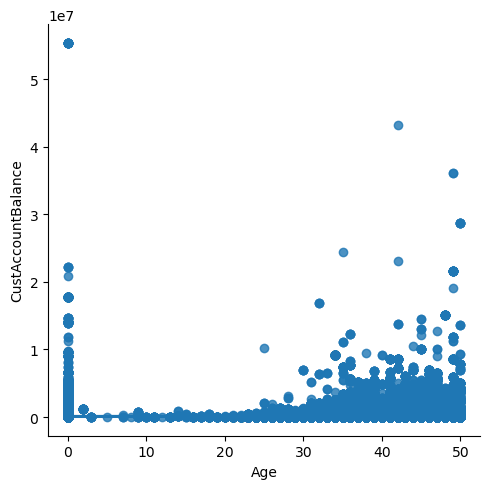

In [43]:
# Create a scatterplot for the "Age" and "CustAccountBalance" columns in seaborn
sns.lmplot(x = 'Age', y = 'CustAccountBalance', data = df_bank)

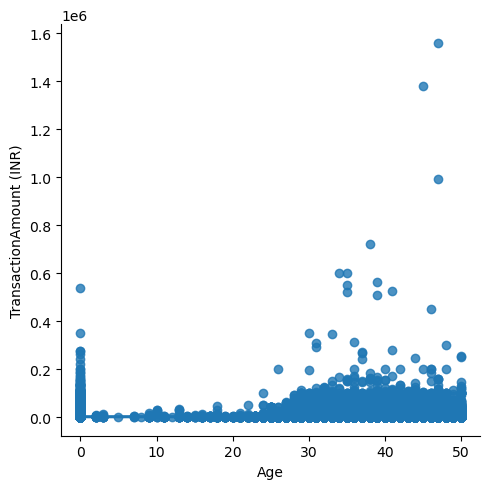

In [44]:
# Create a scatterplot for the "Age" and "TransactionAmount (INR)" columns in seaborn
sns.lmplot(x = 'Age', y = 'TransactionAmount (INR)', data = df_bank)

# Customers over 30 made more number of transactions ,expensive purchases and had higher account balances at the time of the transaction.
# Customers with an age non disclosure  are represented as 0.

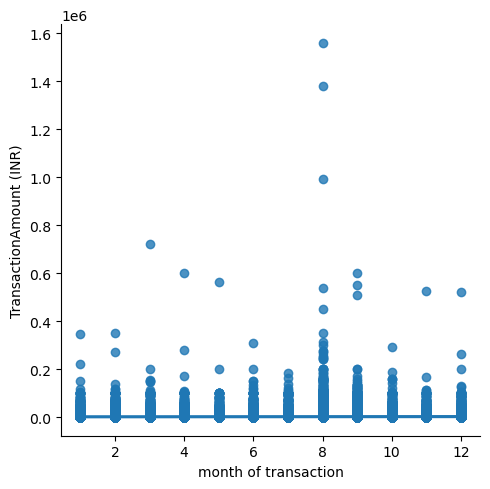

In [45]:
# Create a scatterplot for the "month of transaction" and "TransactionAmount (INR)" columns in seaborn

sns.lmplot(x = 'month of transaction', y = 'TransactionAmount (INR)', data = df_bank)


# The frequency of transactions and the total spent is more in the month of August

# Pair Plots

# Categorical plots

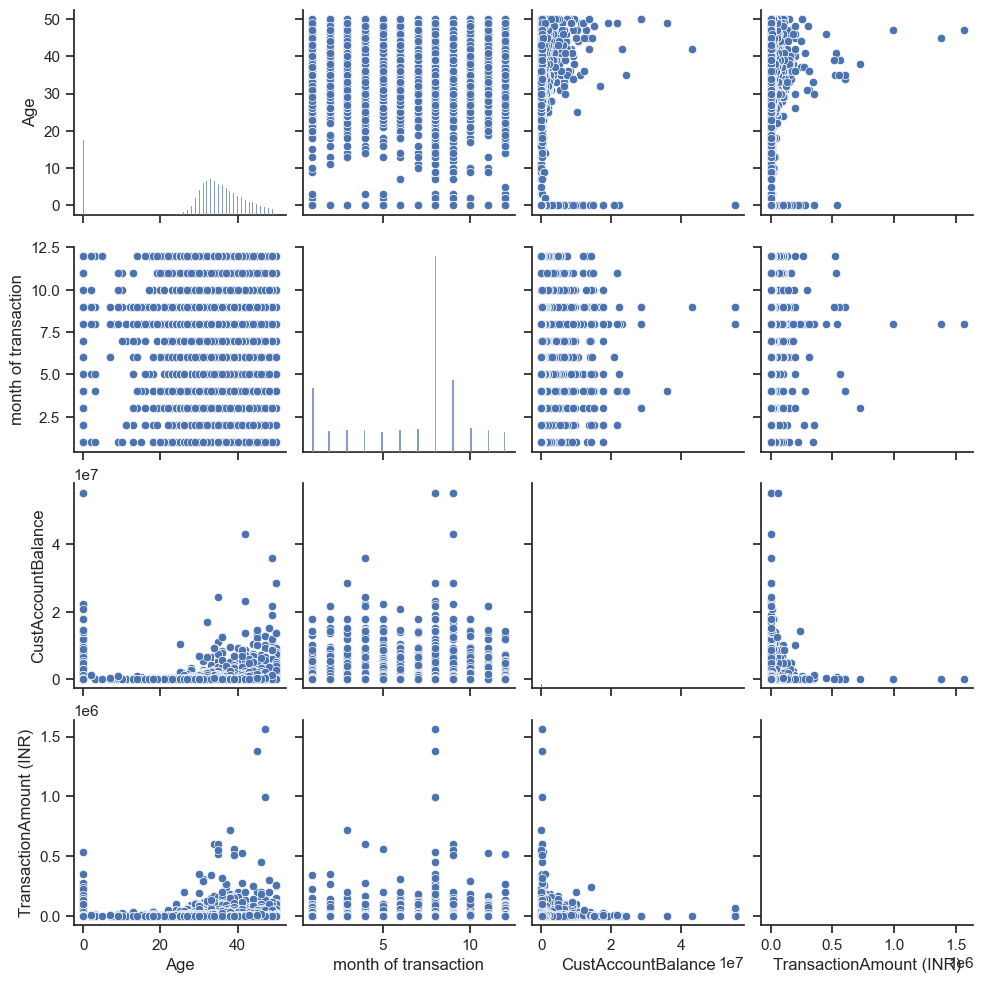

In [90]:
# Create a pair plot 
g = sns.pairplot(df_bank_sub)

<Axes: xlabel='month of transaction', ylabel='Count'>

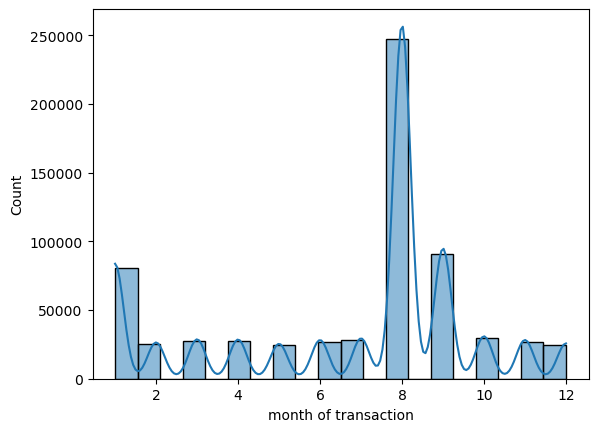

In [47]:
#  histogram to visualize the distribution of the variables.
sns.histplot(df_bank['month of transaction'], bins = 20, kde = True)
#argument "kde" add a line that encompasses the distribution

# More transactions were made in August  followed by September.

<Axes: xlabel='Age', ylabel='Count'>

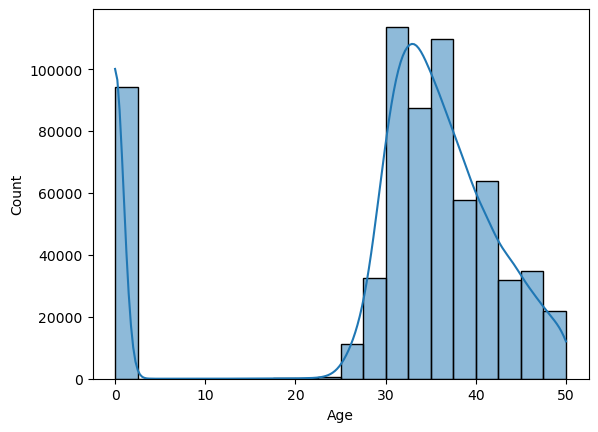

In [48]:
#  histogram to visualize the distribution of the variables.
sns.histplot(df_bank['Age'], bins = 20, kde = True)
#argument "kde" add a line that encompasses the distribution

In [49]:
#  determine sensible categories for the months
df_bank.loc[df_bank['month of transaction']== 8 , 'Month_spend'] = 'High spending Month'
df_bank.loc[df_bank['month of transaction'].isin([1,9]), 'Month_spend'] = 'Medium spending Month'
df_bank.loc[df_bank['month of transaction'].isin ([2,3,4,5,6,7,10,11,12]), 'Month_spend']= 'Low spending Month'


In [50]:
df_bank['month of transaction'].value_counts(dropna=False)

8     247342
9      91088
1      80435
10     29669
7      28231
3      27542
4      27395
11     27091
6      27053
2      25365
12     24690
5      24403
Name: month of transaction, dtype: int64

In [52]:
df_bank['Month_spend'].value_counts(dropna=False)

High spending Month      247342
Low spending Month       241439
Medium spending Month    171523
Name: Month_spend, dtype: int64

In [55]:
df_bank['Age'].value_counts(dropna=False)

0     94222
33    44706
32    42952
34    42608
31    39710
35    39463
36    37025
37    33255
30    31057
38    30458
39    27335
40    23294
41    21850
29    21114
42    18717
43    16248
44    15669
45    13166
46    11594
28    11574
47    10076
48     8487
49     7064
27     6442
50     6386
26     3656
25     1208
24      416
23      146
21       80
22       73
18       46
19       31
16       23
2        22
20       20
17       17
11       16
13       16
9        15
14       14
3         9
15        9
10        8
7         4
12        1
8         1
5         1
Name: Age, dtype: int64

In [63]:
df_bank.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                        object
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                    object
TransactionAmount (INR)           float64
Age                                 int64
month of transaction                int64
Trans_monthname                    object
Month_spend                        object
Age_Group                          object
dtype: object

In [67]:
#  create agegroup
df_bank.loc[(df_bank['Age']>=0 )& (df_bank['Age']<=18 ) , 'Age_Group'] = '0-18'
df_bank.loc[(df_bank['Age']>18 )& (df_bank['Age']<=25 ) , 'Age_Group'] = '19-25'
df_bank.loc[(df_bank['Age']>25 )& (df_bank['Age']<=35 ) , 'Age_Group'] = '26-35'
df_bank.loc[(df_bank['Age']>=36 )& (df_bank['Age']<45 ) , 'Age_Group'] = '36-45'
df_bank.loc[(df_bank['Age']>=45 ), 'Age_Group'] = '45+'

In [68]:
df_bank['Age_Group'].value_counts(dropna=False).sort_index()

0-18      94424
19-25      1974
26-35    283282
36-45    223851
45+       56773
Name: Age_Group, dtype: int64

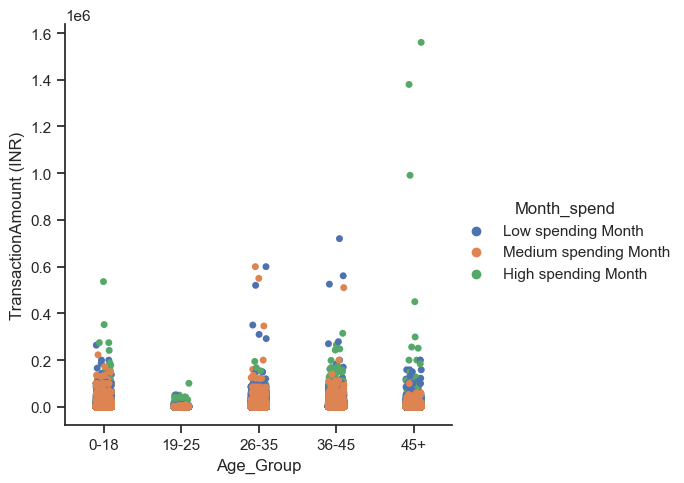

In [75]:
#Create a categorical plot in seaborn using the month spend categories
# order_agebin = pd.value_counts(df_bank['Age_Group']).sort_index().index
sns.set(style="ticks")
# g1 = sns.catplot(x="Age_Group", y="TransactionAmount (INR)", hue="Month_spend", data=df_bank,order = order_agebin)
g1 = sns.catplot(x="Age_Group", y="TransactionAmount (INR)", hue="Month_spend", data=df_bank,order =['0-18', '19-25', '26-35', '36-45', '45+'])

In [78]:
order_agebin

Index(['0-18', '19-25', '26-35', '36-45', '45+'], dtype='object')

In [77]:
#  determine sensible categories for the age
df_bank.loc[(df_bank['Age']>=0 )& (df_bank['Age']<30 ) , 'Age_Category'] = 'Low spenders'
df_bank.loc[(df_bank['Age']>=30 )& (df_bank['Age']<40 ) , 'Age_Category'] = 'High spenders'
df_bank.loc[(df_bank['Age']>=40 ) , 'Age_Category'] = 'Medium spenders'

In [71]:
df_bank.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'Age',
       'month of transaction', 'Trans_monthname', 'Month_spend', 'Age_Group',
       'Age_Category'],
      dtype='object')

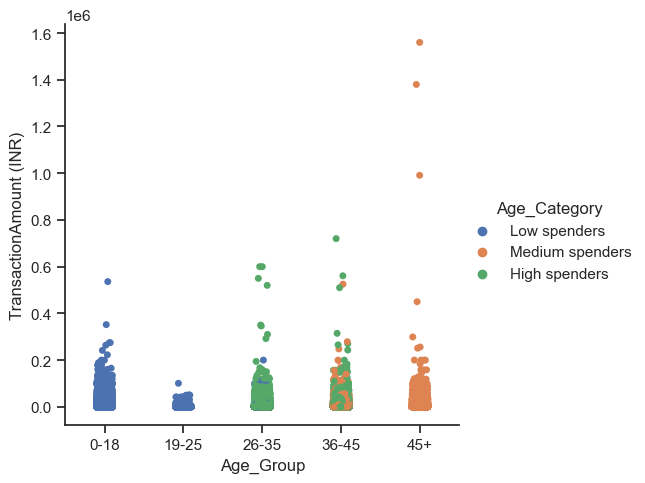

In [81]:
# Create a categorical plot in seaborn using age categories
sns.set(style="ticks")
g2 = sns.catplot(x="Age_Group", y="TransactionAmount (INR)", hue="Age_Category", data=df_bank, order =['0-18', '19-25', '26-35', '36-45', '45+'])

# The age group of 26 to 35 has the most high spenders, followed by those aged 36 to 45.
# Low-spending individuals are younger than 25. 

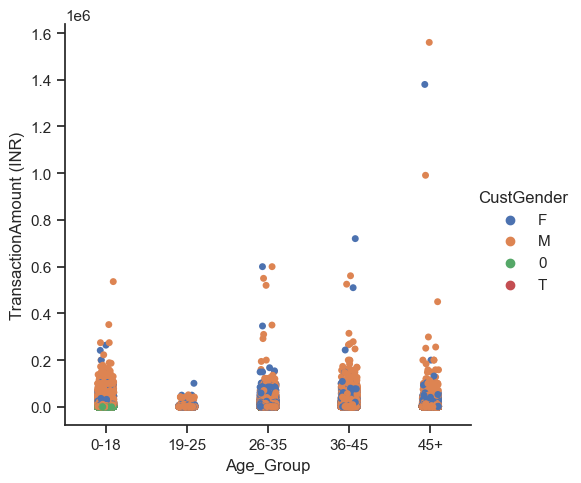

In [82]:
# Create a categorical plot in seaborn using the gender categories
sns.set(style="ticks")
g3 = sns.catplot(x="Age_Group", y="TransactionAmount (INR)", hue="CustGender", data=df_bank,order =['0-18', '19-25', '26-35', '36-45', '45+'])

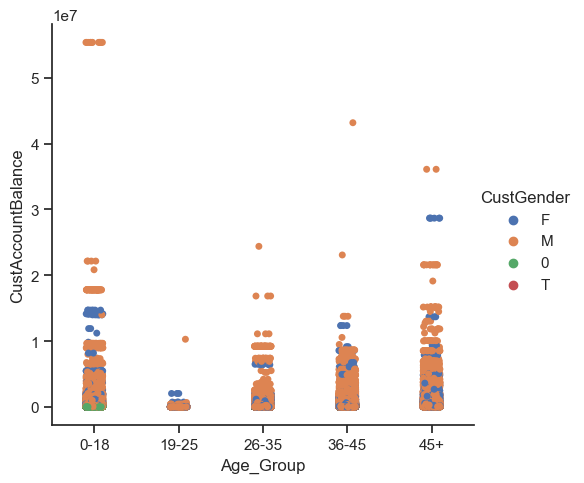

In [83]:
sns.set(style="ticks")
g4 = sns.catplot(x="Age_Group", y="CustAccountBalance", hue="CustGender", data=df_bank,order =['0-18', '19-25', '26-35', '36-45', '45+'])

# Customers with Gender nondisclosure are represented as 0.

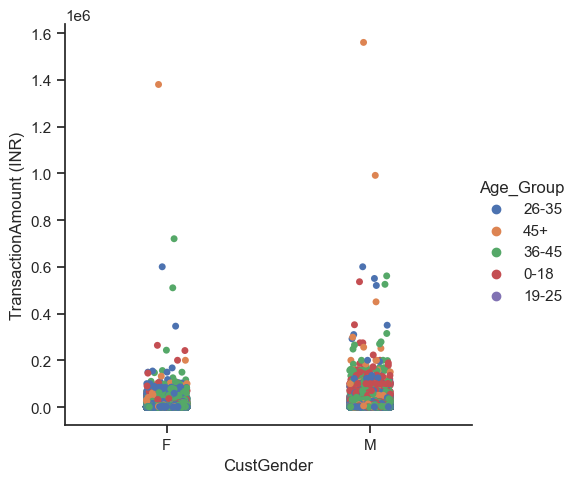

In [89]:
sns.set(style="ticks")
g5 = sns.catplot(x="CustGender", y="TransactionAmount (INR)", hue="Age_Group", data=df_bank,order =['F', 'M'])

# Male customers have marginally higher account balances or number of transactions in comparison to  female customers.